# 🗞️ News Classifier
### - ___Building an Automated News Classification System with NLP Techniques___.
-------------------------------------------------------------------------------------------------------------

### Natural Language Processing(NLP) and Machine Learning 
-------------------------------------------------------------------------------------------------------------------------------------

___Loading the Dataset___ :

In [1]:
#importing the necessary Libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

 - Datasets of different news categories are pulled out from **MYSQL** database

In [2]:
#Importing the mysql library to connect mysql database with python script
import mysql.connector

In [ ]:
#Connecting with MYSQL database
try:
    my_db = mysql.connector.connect(
        host="localhost",
        user="root",
        password="123",
        database="news_classifier")
    print("Connected to MySQL database successfully.")
except mysql.connector.Error as err:
    print("Error connecting to MySQL:", err)
#cursor object
my_cursor=my_db.cursor(buffered=True)

In [ ]:
#lists to hold the data pulled out from MYSQL database
headlines_list=[]
description_list=[]
content_list=[]
url_list=[]
category_list=[]
#Querying the database to retrieve the required data
select_query = f"SELECT * FROM content"
my_cursor.execute(select_query)
for row in my_cursor.fetchall():
      headlines_list.append(row[1])
      description_list.append(row[2])
      content_list.append(row[3])
      url_list.append(row[4])
      category_list.append(row[5])

In [4]:
#Data dictionary 
data={"headlines":headlines_list,"description":description_list,"content":content_list,"url":url_list,"category":category_list }
#Creating a dataframe:
df=pd.DataFrame(data)
df.sample(3)

,headlines,description,content,url,category
7902,SoftBank CEO Son says artificial general intel...,Son has spoken of the potential of AGI - typic...,SoftBank CEO Masayoshi Son said he believes ar...,https://indianexpress.com/article/technology/a...,technology
5204,"‘Beta jab tu Under-19 khel raha tha na, tera b...",Sohail further mentioned that Misbah-ul-Haq go...,You get as you give when it comes to sledging ...,https://indianexpress.com/article/sports/crick...,sports
8091,Ek Hasina Thi: A promising Sriram Raghavan fil...,20 years of Ek Hasina Thi: The Urmila Matondka...,"“Some classics do date,” film director Sriram ...",https://indianexpress.com/article/entertainmen...,entertainment


- ### Each category consists of ***"2000***" **unique data points** with ***"5"*** **different columns.**

___Combining all dataframes into a single dataframe___ :

### Step 1: Initial data cleaning :

- Only ***"content"*** and ***"category"*** columns are taken for NLP and machine Learning tasks and the other colums are neglected.
- ***"Content"*** column to be cleaned and  preprocessed ,because it contains too much of unwanted and irrelavent information .

In [7]:
#Filtering the columns
df_filtered=df[["content","category"]]
df_filtered.sample(5)

,content,category
4458,World Championships medal-winning wrestler Vin...,sports
9349,"Co-writing, directing, producing and starring ...",entertainment
1981,"Adani Total Gas Ltd, the joint venture of bill...",business
1456,"Shares of Supreme Industries, REC and Ashok Le...",business
5452,Lionel Messi’s brother Matias on Wednesday cou...,sports


In [8]:
sample = df_filtered["content"].sample(n=4, random_state=29)
for content in sample:
    print(content)

CUET PG 2024: The National Testing Agency (NTA) will close the application window for the Common University Entrance Test Postgraduate (CUET PG 2024) on January 24. Although the last date to register for the CUET PG 2024 exam is on January 24, candidates will be able to pay the application fee by January 25, 2024. Candidates yet to register for CUET PG 2024 can apply online at the new website – pgcuet.samarth.ac.in.
NTA will also allow the candidates to make corrections in the CUET PG 2024 application form between January 27 and 29, 2024. CUET PG 2024 is set to be conducted between March 11 and 28.
You have exhausted your monthly limit of free stories.
Register to read more stories
Continue With:-
Google
Facebook
Email
Already have an account? Sign in
IT company Happiest Minds Technologies on Tuesday said it has raised capital to the tune of Rs 500 crore through Qualified Institutional Placement (QIP) of equity shares.
The fund-raising committee of the Board of Directors approved the a

 - ___Removing all non usefull words and characters___ :

In [9]:
#import libraries
import re
import emoji

In [10]:
#Function to clean the contents
def text_processing(text):
            #Remove Extra spaces
            text = re.sub(r'\s+', ' ', text).strip()
            #-------------------------------------------------------------------------------------------
            #Removing digits
            text=re.sub(r'\d', '', text)
            #-------------------------------------------------------------------------------------------
            #Removing URL
            pattern_1 = r'https?://\S+|www\.\S+'
            #-------------------------------------------------------------------------------------------
            text= re.sub(pattern_1, '', text)
            #Removing the Emojis
            text = emoji.demojize(text)
            #-------------------------------------------------------------------------------------------
            text = re.sub(r'\w+@', '', text)
            #-------------------------------------------------------------------------------------------
            #List of not usefull words,sentencesa and cahracters etc..,
            not_usefull_list=["@","ADVERTISEMENT",
                        "Register to read more stories Continue With:- Google Facebook Email", "Already have an account?", "Sign in"
                        "Register to continue reading this story Google Facebook Email Already have an account?",
                        "Register to continue reading"," Register Already have an account?","Sign in","CLICK HERE FOR MORE",
                        "BUY NOW" ,"Already a subscriber? ","Subscribe Now", "Already a subscriber?"," Now available with monthly payments",
                        "This premium article is free for now.. . Register","this story Google Facebook Email","Register",
                        "You need a subscription to read this archive article","You have exhausted your monthly limit of free stories","This story is subscriber only",
                        "Now subscribe at a special Republic Day offer of Rs /month","Now subscribe at a special discount of % Use Code"," am"," pm","ELECTION","(Check table)","twitter.com","facebook.com","Get easy access to the content you love with Express Lite","Click","Image Source"]
            
            for i in not_usefull_list:
                text=text.replace(i,"")
            #-------------------------------------------------------------------------------------------    
            return text
            #-------------------------------------------------------------------------------------------
#Creating a new column to store the initially cleaned contents:   
df_filtered["processed_content"]=df_filtered["content"].apply(lambda text : text_processing(text))

In [11]:
#Display the sample of initially cleaned contents
sample = df_filtered["processed_content"].sample(n=5)
for content in sample:
    print("--",content)

-- The University of Sheffield, UK is offering two international LLM scholarships worth £, towards tuition fees for two outstanding students. Interested students can apply for the scholarship at the official website — sheffield.ac.uk/law/postgraduate/scholarships-and-fees. To be eligible for this scholarship, the candidate should be an overseas student for fee purposes, and have an academic offer from the varsity to study the full-time LLM (includes Sheffield LLM, LLM Corporate and Commercial Law and LLM International Law and Global Justice pathways), and also have an application number. .  
-- Scientists used the James Webb Space Telescope to make a breakthrough in the search for understanding how planets are formed. They observed water vapour in distant protoplanetary discs, the precursor to a planet, confirming a long-proposed theory of how planets are formed. Scientists have for long proposed ice-covered pebbles act as the seeds of planet formation. According to this pebble accreti

------------------------------------------------------------------------------------------------------------------------
___Inference___ :
-  Most of the unwanted  ***words,sentences,emojis,characters,numbers*** , are removed.
------------------------------------------------------------------------------------------------------------------------

### Step 2 : Natural Language Processing (NLP)

- ***"spaCy"*** library is used to perforn NLP tasks such as  ***tokenization, lemmatization***  and so on.

In [12]:
import spacy
import string

In [13]:
df_filtered

,content,category,processed_content
0,"Sitharaman, the first full-time woman finance ...",business,"Sitharaman, the first full-time woman finance ..."
1,The merger of Tata group’s budget airlines Air...,business,The merger of Tata group’s budget airlines Air...
2,The Air India group plans to induct one aircra...,business,The Air India group plans to induct one aircra...
3,Indian exporters have asked the central govern...,business,Indian exporters have asked the central govern...
4,The Air India group plans to induct one aircra...,business,The Air India group plans to induct one aircra...
...,...,...,...
9995,"Katrina Kaif’s father-in-law, Sham Kaushal, is...",entertainment,"Katrina Kaif’s father-in-law, Sham Kaushal, is..."
9996,Months after the release of the Prabhas and Kr...,entertainment,Months after the release of the Prabhas and Kr...
9997,Farah Khan Kunder made her debut as a choreogr...,entertainment,Farah Khan Kunder made her debut as a choreogr...
9998,Salman Khan and Katrina Kaif starrer Tiger 3 w...,entertainment,Salman Khan and Katrina Kaif starrer Tiger wa...


In [14]:
#spaCy for NLP
nlp=spacy.load("en_core_web_sm") #Using Small English Model 

In [15]:
#Function for Text Preoprocessing
def text_processing_2(text):
        processed_text_1=[]
        processed_text_2=[]
        #-----------------------------------------------------------------------------
        data=nlp(text)
        for token in data:
               #Rremoving stopwords and punctuations
               if token.is_stop or token.is_punct : 
                    continue
               else:
                   #Lemmatization
                   processed_text_1.append(token.lemma_)
        #-----------------------------------------------------------------------------
        #List of punctuations
        punctuations = string.punctuation
        punctuation_list=list(punctuations)
        #-----------------------------------------------------------------------------
        for text in processed_text_1:
              if text==" " or text=="  " or len(text)==1 :
                       pass
              else:
                        for chr in punctuation_list:
                                if  chr in text: 
                                        text=text.replace(chr,'')
                        processed_text_2.append(text.lower())
        #----------------------------------------------------------------------------     
        #processed_text= [text for text in processed_text if text != " " and text != "  " and len(text) != 1]  
        return  " ".join(processed_text_2)
#---------------------------------------------------------------------------------------------------------------------
# A new column "processed_content_2" added into the dataframe
df_filtered["processed_content_2"]=df_filtered["processed_content"].apply(lambda text: text_processing_2(text)) 

In [16]:
#Display the sample of "NLP" processed contents
sample = df_filtered["processed_content_2"].sample(n=5)
for content in sample:
    print("--",content)

-- actor kareena kapoor khan jaideep ahlawat vijay varma recently see sujoy ghosh jaane jaan kareena open work actor say come different world jaideep reveal effort talk kareena set bad small talk netflix film actors roundtable kareena say feel vijay chemistry fact work fact come different world mean performance circumstance life different cross path help performance nsd kg school act      update late bollywood news entertainment update late news headline india world indian express
-- indian institute science iisc bangalore stop civil right activist journalist teesta setalvad enter institution ahead talk communal harmony justice schedule wednesday discussion organise break silence student group iisc accord member break silence permission seek registrar iisc event hold ccs seminar hall day event intimation notice institution direct security personnel stop setalvad enter campus minute event allege student group later faculty member iisc intervene challenge denial entry setalvad interventi


   - Contents are applied with ***Tokenization*** .
   - ***Stop words , Punctuations*** are removed.
   - Finally the tokens(words) are ***lemmmatized***".
   -----------------------------------------------------------------------------------------------------------------

- ***Word Cloud :***

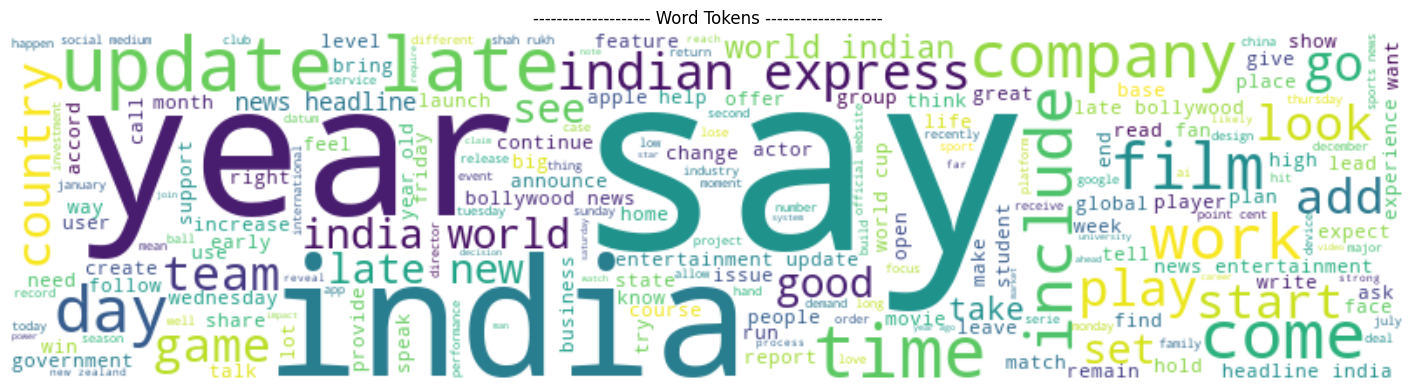

In [199]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------------------
text = ' '.join(df_filtered['processed_content_2'])
wordcloud = WordCloud(width=800, height=200, background_color='white').generate(text)
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("-------------------- Word Tokens --------------------")
plt.show()

### Text Representation :

- The ***words are converted into vectors*** by the word embedding technique ***" Word2Vec "*** .
- ***" Word2Vec "*** is an algorithm ,used to capture the ***Semantic Relationship*** between the words efficiently.

In [200]:
#Importing the library
from gensim.models import Word2Vec

In [201]:
#Converting the "processed_content_2" column into list of tokenized sentences
df_filtered["processed_content_2"]=df_filtered["processed_content_2"].str.split(" ")

In [202]:
#Training the "Word2Vec" model
w2v_model = Word2Vec(df_filtered["processed_content_2"], vector_size=100, window=5, min_count=1, workers=4)

- ***words vocabulary :***

In [ ]:
#Display vocabulary of words
words=list(w2v_model.wv.index_to_key)
# print(words)
print("Length of word vocabulary:",len(words))


- ***most similar words :***

In [204]:
# 
similar_words =w2v_model.wv.most_similar(positive=["year"])
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

decade: 0.811059296131134
trafford: 0.7729175686836243
month: 0.7699748873710632
eighteen: 0.7533780932426453
smigel: 0.7252479195594788
seater: 0.7182380557060242
cypress: 0.6955775618553162
nineteen: 0.6942291259765625
week: 0.687263011932373
ghapla: 0.6837632656097412


- ***cosine similarity :***

In [205]:
print('cosine similarity between "india" and "world" is',w2v_model.wv.similarity('india', 'world'))
print('cosine similarity between "apple" and "end" is',w2v_model.wv.similarity('apple', 'end'))
print('cosine similarity between "go" and "issue" is',w2v_model.wv.similarity('go', 'issue'))

cosine similarity between "india" and "world" is 0.5277102
cosine similarity between "apple" and "end" is 0.34280613
cosine similarity between "go" and "issue" is 0.22160389


- Save the text representation model for later use:

In [211]:
w2v_model.save("word2vec_model.bin")

 ###  Words to Vector transformation :

In [144]:
import numpy as np
def vectorize(words_list):
    words_vecs = [w2v_model.wv[word] for word in words_list if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)
#creating a new column to store vectors
df_filtered["content_vector"]=df_filtered["processed_content_2"].apply(vectorize)
df_filtered["content_vector"].head(3)

0    [-0.4141415, 0.2957461, 0.2497226, -0.30895653...
1    [-0.358875, 0.16167332, 0.3424199, -0.46950623...
2    [-0.5980007, 0.15611301, 0.44995034, -0.357412...
Name: content_vector, dtype: object

# ------------------- Machine Learning --------------------

 - In machine learning part two tasks will be done, one is **clustering** the different news categories together and labelling the categories manually.
 - Another one is a **Classification Task** in which a model is trained to predict the news category.
     -  ***"K-means Clustering"*** algorithm is used for clustering task.
     -  ***"Multinomial Naive Bayes"*** algorithm is used for classification task.

### K-means Clustering :

In [145]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [132]:
content_vector_array=df_filtered["content_vector"].apply(np.array)

In [147]:
#
num_clusters= 5 #number of clusters is "5", because we have 5 different categoriess of news
kmeans = KMeans(n_clusters=num_clusters, random_state=77)
#Converting to numpy array
content_vector_array=np.array(df_filtered["content_vector"].tolist())
kmeans.fit_predict(content_vector_array)
labels = kmeans.labels_

- ***visualization :***

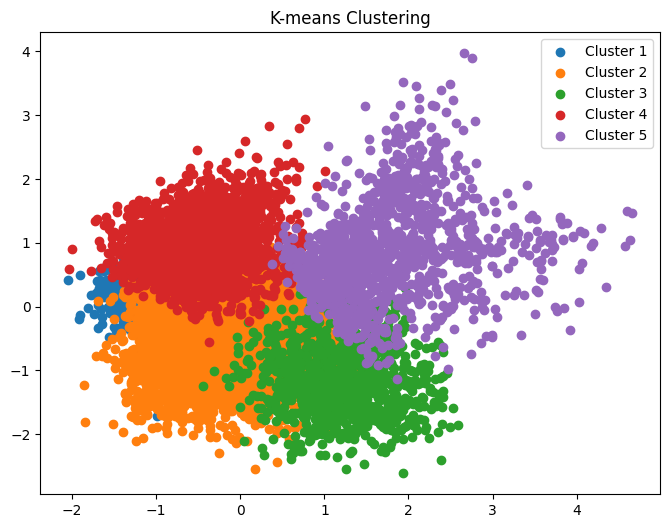

In [149]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(content_vector_array)
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(embeddings_2d[labels == i, 0], embeddings_2d[labels == i, 1], label=f'Cluster {i+1}')
plt.title('K-means Clustering')
plt.legend()
plt.show()

  - ***Clusters with their corresponding words :***

In [150]:
# Interpret clusters
cluster_contents = {}
for i in range(num_clusters):
    cluster_contents[i] = []
#-------------------------------------------------------------------
for i, label in enumerate(labels):
    cluster_contents[label].append(words[i])
#-------------------------------------------------------------------
for cluster_id, contents in cluster_contents.items():
    print(f"Cluster {cluster_id}:")
    print(contents)

Cluster 0:
['tournament', 'clear', 'keep', 'health', 'regulatory', 'kannada', 'abu', 'personality', 'ho', 'madhya', 'spicejet', 'javed', 'dispute', 'wfi', 'gautam', 'mere', 'appointment', 'principle', 'adapt', 'odd', 'journal', 'beta', 'wind', 'iyer', 'grid', 'engagement', 'upper', 'apiece', 'agarwal', 'assist', 'deserve', 'grants', 'cook', 'eliminate', 'farmer', 'absence', 'island', 'mah', 'oppo', 'proper', 'assistance', 'arbaaz', 'gun', 'bsc', 'markets', 'violent', 'terminal', 'broadcaster', 'snapchat', 'triple', 'careful', 'lokesh', 'wood', 'chartered', 'reiterate', 'sharmila', 'mike', 'attorney', 'mary', 'alternate', 'phogat', 'vegetarian', 'elect', 'tiwari', 'lahore', 'crazy', 'renuka', 'hanuman', 'customise', 'payments', 'yeah', 'pep', 'earthquake', 'delight', 'speculate', 'stamp', 'punia', 'bundle', 'aston', 'ronit', 'leach', 'sai', 'endeavour', 'partners', 'mediatek', 'donation', 'kia', 'combat', 'unclear', 'cs', 'buch', 'shankar', 'sufficient', 'due', 'reservation', 'berlin', 

  - ***Labelling the cluster labels with categories manually:***
  
    - By seeing the "clusterd words" ,it is not able to conclude the clusters category.There is no enough evidence seen ,to label the clusters manually,every clusters  looks like similar .This problem will be solved in future with a enough and  clean dataset and best preprocessing.

#  Classification Task

- Here in classification the contents vectors are trained to predict their corresponding news categories.
- "***Support Vector Machine (SVM) Classifier*** is used to perform classification task.

***Feature and Target variables :***

In [154]:
#Feature variables(vectors)
X=content_vector_array
#------------------------------------------------------------------------------------------------------
#Target variable(category)
#Label encoding the target variable
y=df_filtered["category"].replace({"business":1,"education":2,"sports":3,"technology":4,"entertainment":5})

In [251]:
print(X[0])

(100,)


In [156]:
y.value_counts()

category
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64

 ### ***Model training***

***train test split :***

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

***model training with hyper parameter tuning :***

In [160]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV #for hyperparameter tuning

In [ ]:
# Train the Multinomial Naive Bayes classifier
model= svm.SVC()
model.fit(X_train, y_train)
# Prediction
y_pred = model.predict(X_test)

In [ ]:
# Train the model with SVM classifier
model= svm.SVC()
#-------------------------------------------------------------------
param_grid = {
                'C': [0.1, 1, 10, 100],  
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma': ['scale', 'auto']  
            }
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
#--------------------------------------------------------------------
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
#--------------------------------------------------------------------
#Predict with best estimator
y_pred = best_estimator.predict(X_test)
#--------------------------------------------------------------------
print("Best Parameters",best_params)
print("Best Estimator",grid_search.best_estimator_)

Best Parameters {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Estimator SVC(C=100)


***evaluation metrics :***

In [192]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#------------------------------------------------------------------------------
report = classification_report(y_test, y_pred, output_dict=True)
class_report = pd.DataFrame(report).transpose()
print("classification report:" )
class_report

classification report:


,precision,recall,f1-score,support
1,0.949029,0.953659,0.951338,410.0000
2,0.981959,0.969466,0.975672,393.0000
3,0.966837,0.959494,0.963151,395.0000
4,0.933174,0.942169,0.937650,415.0000
5,0.969152,0.974160,0.971649,387.0000
accuracy,0.959500,0.959500,0.959500,0.9595
macro avg,0.960030,0.959789,0.959892,2000.0000
weighted avg,0.959621,0.959500,0.959543,2000.0000


***confusion matrix :***

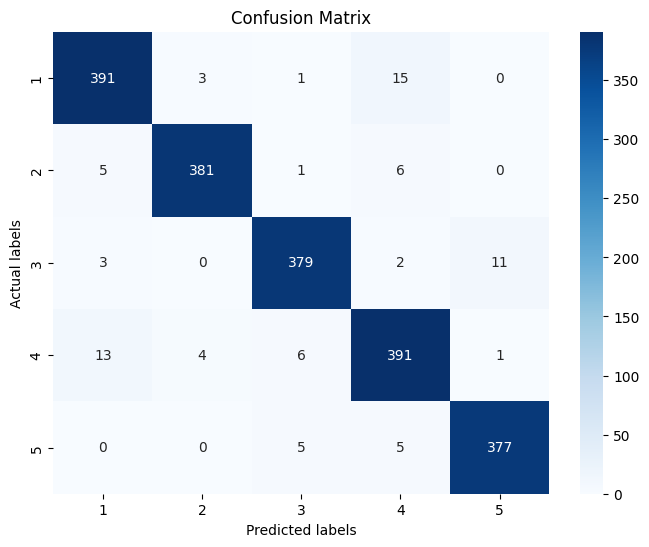

In [191]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#-----------------------------------------------------------------------------
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(set(y_test)), 
            yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [207]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9595
Precision: 0.9596206227634051
Recall: 0.9595
F1 Score: 0.9595428099521021


### Save the model:
   - The model is saved for later use.

In [194]:
import pickle
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### Conclusion:

***Model accuracy : 95 %***

The accuracy of the model in predicting the categories is good.In future the model may be trained with different other text representations, algorithms with huge data and  proper preprocessing , the accuracy level can be achieved more.

------------------------------------------------------------------------------------------------------------------------

# Sample Prediction

***Loading the saved models :***

In [2]:
#Word2Vec model
from gensim.models import Word2Vec
w2v_model=Word2Vec.load("word2vec_model.bin")
#------------------------------------------------
import pickle
#SVM classifier
with open("svm_model.pkl", "rb") as f:
    svm_classifier_model = pickle.load(f)

***Prediction :***

In [27]:
#Input news
text="""
The Formula One’ Silly Season’ looked like it would be sedate this year when two key drivers, Charles Leclerc and Lando Norris, signed long-term deals with Ferrari and McLaren, respectively. Little did anyone in the F1 world expect a bombshell that dropped on February 1 when it was announced Lewis Hamilton was set to join Ferrari in 2025. While there had been rumours about Hamilton taking a swing in the red car, it appeared the door had been shut when the seven-time world champion signed a two-year extension with Mercedes last year, taking him till the end of 2025.
At the end of 2024, Hamilton would have spent 12 years at Mercedes, a team he joined in 2013 and has had incredible success, winning six world titles. With his decision to activate a clause in a contract that allowed him to leave in 2025, the most successful driver in F1 has put his team in a bind as it scurries for a replacement.
"""

In [28]:
import re
import emoji
#spaCy for NLP
import spacy
nlp=spacy.load("en_core_web_sm") #Using Small English Model
#-----------------------------------------------------------------------------------------
processed_text=[]
#------------------------------------------------------------------------------------------
#Remove Extra spaces
text = re.sub(r'\s+', ' ', text).strip()
#-------------------------------------------------------------------------------------------
#Removing digits
text=re.sub(r'\d', '', text)
#-------------------------------------------------------------------------------------------
#Removing URL
pattern_1 = r'https?://\S+|www\.\S+'
#-------------------------------------------------------------------------------------------
text= re.sub(pattern_1, '', text)
#Removing the Emojis
text = emoji.demojize(text)
#-------------------------------------------------------------------------------------------
text = re.sub(r'\w+@', '', text)
data=nlp(text)
for token in data:
        #Removing stopwords and punctuations
        if token.is_stop or token.is_punct or token.like_num or token.text==" " or token.text=="|" or len(token.text)==1:
            continue
        else:
            
            #Lemmatization
            processed_text.append(token.lemma_.lower())

In [29]:
print(processed_text)

['formula', 'silly', 'season', 'look', 'like', 'sedate', 'year', 'key', 'driver', 'charles', 'leclerc', 'lando', 'norris', 'sign', 'long', 'term', 'deal', 'ferrari', 'mclaren', 'respectively', 'little', 'world', 'expect', 'bombshell', 'drop', 'february', 'announce', 'lewis', 'hamilton', 'set', 'join', 'ferrari', 'rumour', 'hamilton', 'take', 'swing', 'red', 'car', 'appear', 'door', 'shut', 'time', 'world', 'champion', 'sign', 'year', 'extension', 'mercedes', 'year', 'take', 'till', 'end', 'end', 'hamilton', 'spend', 'year', 'mercedes', 'team', 'join', 'incredible', 'success', 'win', 'world', 'title', 'decision', 'activate', 'clause', 'contract', 'allow', 'leave', 'successful', 'driver', 'team', 'bind', 'scurry', 'replacement']


In [30]:
#Words converted to vectors
import numpy as np
def vectorize(words_list):
    words_vecs = [w2v_model.wv[word] for word in words_list if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)
#Creating a new column to store vectors
content_vectors=vectorize(processed_text)
#Reshaping the vector size
content_vectors_reshaped = content_vectors.reshape(1, -1)
predicted_value=svm_classifier_model.predict(content_vectors_reshaped)
predicted_value=predicted_value[0]
def category(value):
    if value==1:
        return"Business"
    if value==2:
        return "Education"
    if value==3:
        return "Sports"
    if value==4:
        return "Technology"
    if value==5:
        return "Entertainment"
news_category=category(predicted_value)
print(f'The news content belongs to the category :"{news_category}"')

The news content belongs to the category :"Sports"
